# 单价因子是看房子单价对保值程度的影响。首先，我将所有小区按照2014全年的成交均价分成多层，然后分别看各层次小区近年来的走势

In [11]:
from common import read
df = read('北京')

data/chengjiao-北京/2019-08-02-北京.xls
data/chengjiao-北京/2019-08-03-北京.xls
data/chengjiao-北京/2019-08-07-北京.xls
data/chengjiao-北京/2019-08-09-北京.xls
data/chengjiao-北京/2019-08-16-北京.xls
data/chengjiao-北京/all.csv
data/chengjiao-北京/chengjiao-2019-08-01-北京.xls
data/chengjiao-北京/北京.csv


/Users/alex/Quant/code/LianjiaSpider/common.py:84: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=True'.

To retain the current behavior and silence the warning, pass sort=False

  df = pd.concat(dfs)


525254


In [2]:
import pandas as pd
import numpy as np
df2014 = df.loc[df['成交时间']<'2015-01-01']
df2014 = df2014.loc[df2014['成交时间']>='2014-01-01']
price = df2014.groupby('小区')['成交价(元/平)'].mean()
gp = price.groupby(pd.cut(price, price.quantile(np.arange(0, 1.01, 0.25))))

In [5]:
df2014a = df.loc[df['成交时间']>'2015-01-01']
items = list(gp.groups.items())
dfs = [df2014a.loc[df2014a['小区'].isin(item[1])] for item in items]
legends = [str(item[0]) for item in items]
legends

['(5112.0, 30042.105]',
 '(30042.105, 39446.899]',
 '(39446.899, 49804.05]',
 '(49804.05, 138388.0]']

/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


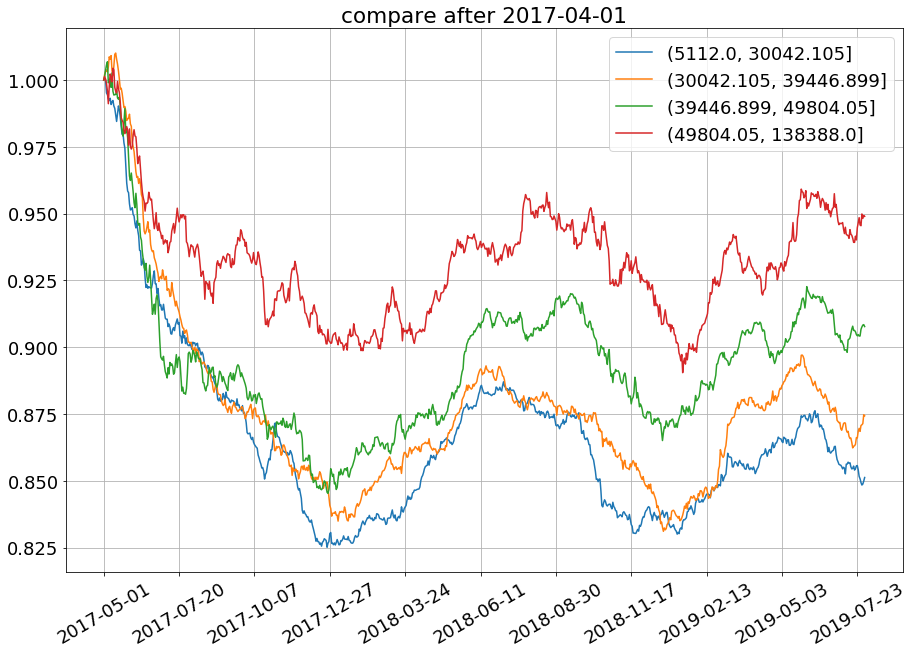

In [10]:
from common import plot_dfs
start_date = '2017-04-01'
df2014a = df.loc[df['成交时间']>start_date]
items = list(gp.groups.items())
dfs = [df2014a.loc[df2014a['小区'].isin(item[1])] for item in items]
legends = [str(item[0]) for item in items]
legends
plot_dfs(dfs, 'compare after %s'%start_date, legends)